In [1]:
!pip install --upgrade google-api-python-client
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import matplotlib.pyplot as plt


In [2]:
api_key = '***'
channel_ids = ['UCmoMxFxfjHJIicCv1eV_tSA', #tgcom24
               'UC9ePmjVRHLL8x8vq5fOKflg', # la repubblica
               'UCB3e_9sPf7whZA4PfGXrIMQ', # quotidiano nazionale
               'UCCuZicOOisRgknWUSQArudg', # sole24h
               'UCWJhBqnyVdHAuxexgjghNFw', # fanpage
               'UCPfFXhCgc6cciu3aYm-9AdA'# fattoquotidiano
               
               
               
              
              ]

youtube = build('youtube', 'v3', developerKey=api_key)

## Function to get channel statistics

In [3]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
                part='snippet,contentDetails,statistics',
                id=','.join(channel_ids))
    response = request.execute() 
    
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
    
    return all_data

In [4]:
channel_statistics = get_channel_stats(youtube, channel_ids)

In [5]:
channel_statistics 

[{'Channel_name': 'La Repubblica',
  'Subscribers': '692000',
  'Total_videos': '29519',
  'Views': '680050335',
  'playlist_id': 'UU9ePmjVRHLL8x8vq5fOKflg'},
 {'Channel_name': 'QuotidianoNazionale',
  'Subscribers': '187000',
  'Total_videos': '15381',
  'Views': '98658624',
  'playlist_id': 'UUB3e_9sPf7whZA4PfGXrIMQ'},
 {'Channel_name': 'Tgcom24',
  'Subscribers': '86000',
  'Total_videos': '3793',
  'Views': '54184417',
  'playlist_id': 'UUmoMxFxfjHJIicCv1eV_tSA'},
 {'Channel_name': 'Il Fatto Quotidiano',
  'Subscribers': '374000',
  'Total_videos': '21092',
  'Views': '185005130',
  'playlist_id': 'UUPfFXhCgc6cciu3aYm-9AdA'},
 {'Channel_name': 'Fanpage.it',
  'Subscribers': '2810000',
  'Total_videos': '31719',
  'Views': '2547723544',
  'playlist_id': 'UUWJhBqnyVdHAuxexgjghNFw'},
 {'Channel_name': 'Il Sole 24 ORE',
  'Subscribers': '113000',
  'Total_videos': '30647',
  'Views': '67788887',
  'playlist_id': 'UUCuZicOOisRgknWUSQArudg'}]

In [6]:
channel_data = pd.DataFrame(channel_statistics)

In [7]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,La Repubblica,692000,680050335,29519,UU9ePmjVRHLL8x8vq5fOKflg
1,QuotidianoNazionale,187000,98658624,15381,UUB3e_9sPf7whZA4PfGXrIMQ
2,Tgcom24,86000,54184417,3793,UUmoMxFxfjHJIicCv1eV_tSA
3,Il Fatto Quotidiano,374000,185005130,21092,UUPfFXhCgc6cciu3aYm-9AdA
4,Fanpage.it,2810000,2547723544,31719,UUWJhBqnyVdHAuxexgjghNFw
5,Il Sole 24 ORE,113000,67788887,30647,UUCuZicOOisRgknWUSQArudg


In [8]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

# Channels subscribers

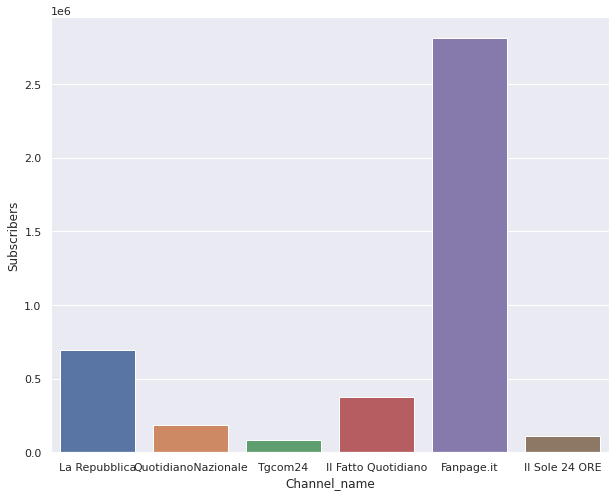

In [9]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='Channel_name', y='Subscribers', data=channel_data)

# Channels views

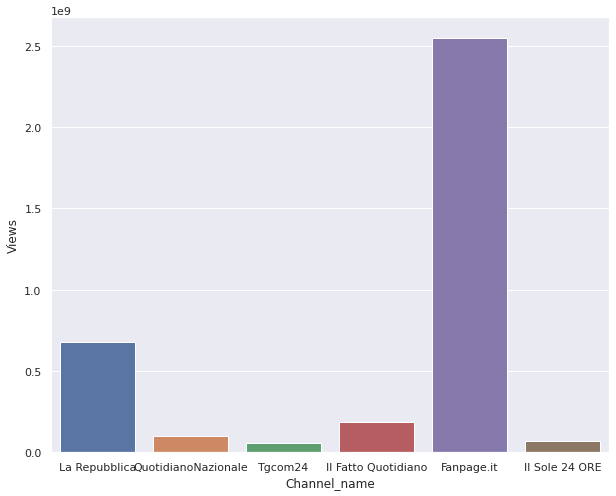

In [10]:
ax = sns.barplot(x='Channel_name', y='Views', data=channel_data)

# Channels total videos

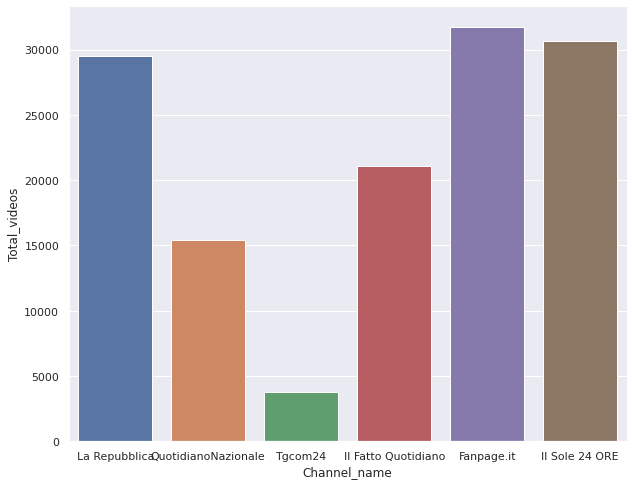

In [11]:
ax = sns.barplot(x='Channel_name', y='Total_videos', data=channel_data)

#Focus on the channel with most views and subscribers

In [12]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='Fanpage.it', 'playlist_id'].iloc[0]

## Function to get video ids

In [13]:

def get_video_ids(youtube, playlist_id):
    
    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50)
    response = request.execute()
    
    video_ids = []
    
    for i in range(len(response['items'])):
        
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part='contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token)
            response = request.execute()
    
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            
            next_page_token = response.get('nextPageToken')
        
    return video_ids
    

In [14]:
video_ids = get_video_ids(youtube, playlist_id)

In [15]:
video_ids

['TugSVm7Upt0',
 '6leNU8b7K08',
 'nRsEsKvrCoc',
 'ooKRY1MpyYM',
 'VZqxnXNge9s',
 'OE2dBNoHnsc',
 '2ued45O1dsw',
 'KU3EmgS9QVY',
 'KIOhJ08ReZk',
 '7O9kGnyq1H0',
 'JBjtYdWeBNc',
 'PwqYwbcjVnw',
 'pwNUWvyNzQ4',
 'Kjg4ywwiI-0',
 'XaNr0B6Fmfw',
 'ZUeFhoJ9QRc',
 '-V-qfE_DMLw',
 'nPiZJ9_wICY',
 '4-FXvQ7mONM',
 'p-VDII7h-cM',
 'Ur1RkmeBDCQ',
 'NUWkqy5tBVc',
 'LbP0Rq77KvI',
 'ZoRVC7e-_n8',
 'Bpfq371qWGE',
 'jvKIFpDpKXE',
 'IhWu77FtpsQ',
 'i9YOoro2jQw',
 'QVbTRVrr7QI',
 'OkizJrExZdI',
 'QjlMM2KpmCQ',
 'oDTdIlOPw3M',
 'ZckCsB12sLM',
 'cCbq5mMeFP8',
 'Xsfj8Al85zw',
 'f3dw6bGsqeQ',
 'IMcieSRjPZI',
 '8jy5ElUMBXk',
 '8gcaMTnKNAo',
 'O0gGY2iNx3Q',
 'vtOtsc_KJ4I',
 'hfzSctVfR38',
 'CeRhG6jKJQo',
 'rgI7Wyty7nI',
 'wYT-udNvEPk',
 '8ePlrtYoxCA',
 'xmz1QwfIfpk',
 'ij0nTHnNhfI',
 'OOdEVCZYjuU',
 'Azpt0fgjXrE',
 'eZpSebkHR0U',
 '-Ov8M4CApIg',
 'TLwJ0emyH5Y',
 '4dZsgxOgjM4',
 'z6qmztpDxDY',
 'DmFvX979vNk',
 '5vi1vEtIB4g',
 'peTIW5fZAJQ',
 'aDaFpipyNSY',
 'ipEIqYICwI0',
 'jIDXhtACFCY',
 '-5CoctR_Zvs',
 'xt2JVk

## Function to get video details

In [16]:
def get_video_details(youtube, video_ids):
    all_video_stats = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
                    part='snippet,statistics',
                    id=','.join(video_ids[i:i+50]))
        
        response = request.execute()
        
        
        for video in response['items']:
          try:
            Comments = video['statistics']['commentCount']
          except:
            Comments = video.get('commentCount', 0)
          video_stats = dict(Title = video['snippet']['title'],
                             Published_date = video['snippet']['publishedAt'],
                             Views = video['statistics']['viewCount'],
                             Likes = video['statistics']['likeCount'],
                             Comments= Comments
                             
                             )
                               
           
            
             
          all_video_stats.append(video_stats)
            

    
    return all_video_stats

In [17]:
video_details = get_video_details(youtube, video_ids)

In [18]:
video_details

[{'Comments': '11',
  'Likes': '36',
  'Published_date': '2022-08-12T05:00:19Z',
  'Title': 'Perché Ryanair non venderà più biglietti scontatissimi: “Dite addio ai voli a 10 euro”',
  'Views': '2140'},
 {'Comments': '87',
  'Likes': '134',
  'Published_date': '2022-08-11T20:25:26Z',
  'Title': 'Intrappolato 8 ore in un tunnel sottoterra: folla applaude quando i pompieri lo estraggono vivo',
  'Views': '10497'},
 {'Comments': '11',
  'Likes': '107',
  'Published_date': '2022-08-11T19:30:03Z',
  'Title': '5 modi per combattere ansia e stress #shorts',
  'Views': '1734'},
 {'Comments': '357',
  'Likes': '587',
  'Published_date': '2022-08-11T18:00:30Z',
  'Title': 'LucyLein a Fanpage: "Senza fare porno, guadagno 50.000 euro netti al mese su OnlyFans"',
  'Views': '17188'},
 {'Comments': '50',
  'Likes': '171',
  'Published_date': '2022-08-11T17:00:29Z',
  'Title': 'Maria De Filippi: “Non so se avrò la forza di tenere la mano a Costanzo quando morirà”',
  'Views': '21185'},
 {'Comments': '

In [19]:
video_data = pd.DataFrame(video_details)

In [20]:
video_data

,Title,Published_date,Views,Likes,Comments
0,Perché Ryanair non venderà più biglietti scont...,2022-08-12T05:00:19Z,2140,36,11
1,Intrappolato 8 ore in un tunnel sottoterra: fo...,2022-08-11T20:25:26Z,10497,134,87
2,5 modi per combattere ansia e stress #shorts,2022-08-11T19:30:03Z,1734,107,11
3,"LucyLein a Fanpage: ""Senza fare porno, guadagn...",2022-08-11T18:00:30Z,17188,587,357
4,Maria De Filippi: “Non so se avrò la forza di ...,2022-08-11T17:00:29Z,21185,171,50
...,...,...,...,...,...
19928,"Chiara Ferragni incinta da tre mesi di Fedez, ...",2017-09-05T17:21:55Z,165826,2861,219
19929,"Test di ingresso a Medicina, protesta degli st...",2017-09-05T16:26:49Z,8087,187,37
19930,Tutto quello che sappiamo sull'iPhone 8 (in 60...,2017-09-05T15:50:49Z,93496,1892,672
19931,"Napoli, rom trasferiti nella caserma. Blocco s...",2017-09-05T14:51:51Z,9952,163,72


In [21]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data

,Title,Published_date,Views,Likes,Comments
0,Perché Ryanair non venderà più biglietti scont...,2022-08-12,2140,36,11
1,Intrappolato 8 ore in un tunnel sottoterra: fo...,2022-08-11,10497,134,87
2,5 modi per combattere ansia e stress #shorts,2022-08-11,1734,107,11
3,"LucyLein a Fanpage: ""Senza fare porno, guadagn...",2022-08-11,17188,587,357
4,Maria De Filippi: “Non so se avrò la forza di ...,2022-08-11,21185,171,50
...,...,...,...,...,...
19928,"Chiara Ferragni incinta da tre mesi di Fedez, ...",2017-09-05,165826,2861,219
19929,"Test di ingresso a Medicina, protesta degli st...",2017-09-05,8087,187,37
19930,Tutto quello che sappiamo sull'iPhone 8 (in 60...,2017-09-05,93496,1892,672
19931,"Napoli, rom trasferiti nella caserma. Blocco s...",2017-09-05,9952,163,72


In [22]:
top10_videos = video_data.sort_values(by='Views', ascending=False).head(10)

In [28]:
top10_videos

,Title,Published_date,Views,Likes,Comments
12401,Rapinatore gli punta il fucile al petto e lui ...,2019-09-13,9666771,123046,4978
18018,Dedicare una canzone alle prostitute: l'esperi...,2018-03-08,7743223,212607,6971
12990,Le 10 scuse di Lorenzo per non fare il bagno,2019-07-25,7487291,80803,1928
12498,"Telefonata truffa, per sbaglio chiamano la pol...",2019-09-06,7183166,155820,1706
17597,Arriva alla cassa ma non ha soldi per pane e l...,2018-04-19,7172499,104922,5170
16255,Prof razzista attacca studentessa musulmana. L...,2018-09-18,6131795,160340,9593
19528,Uomo di 45 anni sposa bambina di 12 anni: le r...,2017-10-10,5989534,88811,3359
14988,Salveresti la vita a un immigrato? [ESPERIMENT...,2019-02-19,5645767,221212,12056
12886,Sta per soffocare per un boccone di traverso. ...,2019-08-01,5341251,46614,1984
14600,"""Mamma mi diede in sposa a un orco, in grembo ...",2019-03-29,4878899,85431,2912


#Fanpage most viewed videos (TOP10)

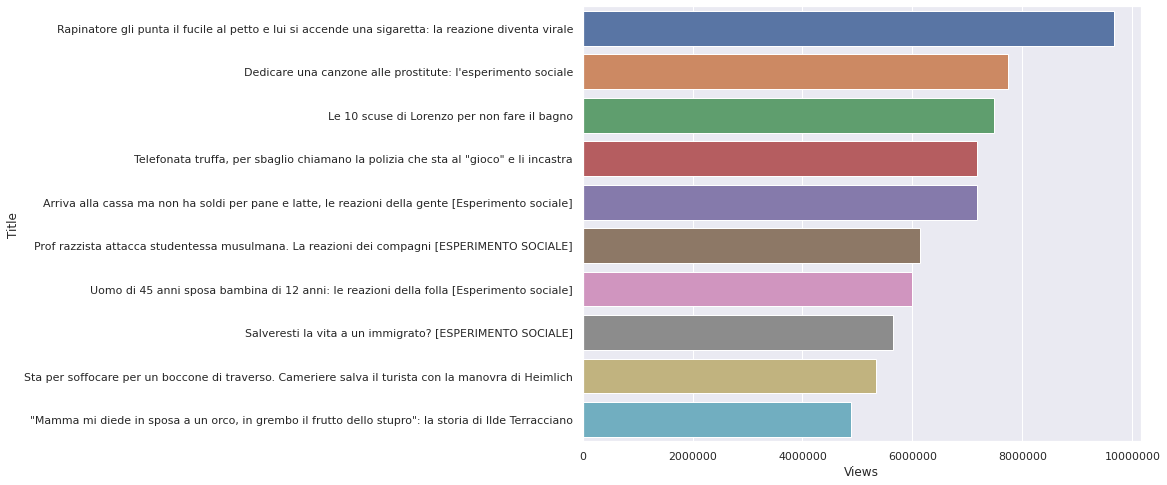

In [27]:
ax1 = sns.barplot(x='Views', y='Title', data=top10_videos)
plt.ticklabel_format(style='plain', axis='x')


#Adding 'Year' column

In [ ]:
video_data['Year'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%Y')

In [ ]:
video_data

,Title,Published_date,Views,Likes,Comments,Year
0,"Ha 42 anni, da 7 non trova lavoro, laureata e ...",2022-06-17,40380,498,416,2022
1,"Attore di Riverdale uccide la madre, il suo pe...",2022-06-17,19647,271,77,2022
2,"Bruno Pereira e Dom Phillips trovati morti, er...",2022-06-17,121467,851,123,2022
3,"Milano, nelle case Aler abusivi nei box, urina...",2022-06-17,101541,646,312,2022
4,La classifica dei segni più fortunati della se...,2022-06-17,43733,493,30,2022
...,...,...,...,...,...,...
19478,Tutto quello che sappiamo sull'iPhone 8 (in 60...,2017-09-05,93496,1892,672,2017
19479,"Napoli, rom trasferiti nella caserma. Blocco s...",2017-09-05,9952,163,72,2017
19480,"Artrite reumatoide, svolta storica: medici ita...",2017-09-05,8759,200,17,2017
19481,"Bimba morta di Malaria: ""In ospedale c'erano d...",2017-09-05,20689,339,161,2017


In [ ]:
videos_per_year = video_data.groupby('Year', as_index=False).size()

In [ ]:
videos_per_year

,Year,size
0,2017,1220
1,2018,3338
2,2019,4506
3,2020,4886
4,2021,3776
5,2022,1757


In [ ]:
videos_per_year.index = pd.CategoricalIndex(videos_per_year['Year'], categories=videos_per_year['Year'], ordered=True)

In [ ]:
videos_per_year = videos_per_year.sort_index()

#Views per year

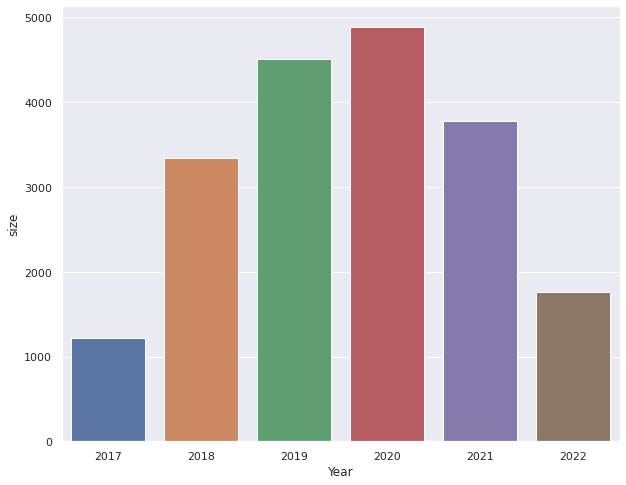

In [ ]:
ax2 = sns.barplot(x='Year', y='size', data=videos_per_year)

In [29]:
video_data.to_csv('Video_Details(Fanpage.csv)') #saving results